In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ridaa\Earthquake_Prediction\Notebook_Experiments\Data\data.csv')


In [12]:
#check the shape of the dataset
df.shape

(3855719, 7)

In [13]:
#check the first 5 rows of the dataset
df.head()

,latitude,longitude,depth,mag,id,hour,date
0,34.189835,-117.58800,6.000,1.70,ci12317071,0,1973-01-01
1,-9.214000,150.63400,41.000,5.30,usp0000001,3,1973-01-01
2,48.308666,-122.11733,13.680,2.20,uw10840118,4,1973-01-01
3,-15.012000,-173.95800,33.000,5.00,usp0000002,5,1973-01-01
4,19.443666,-155.36084,7.302,1.85,hv19723167,7,1973-01-01


In [14]:
# check the last 5 rows of the dataset
df.tail()

,latitude,longitude,depth,mag,id,hour,date
3855714,33.371334,-116.87400,5.27,2.14,ci39900287,23,2021-12-31
3855715,60.040165,-153.11884,0.33,-0.57,av91455906,23,2021-12-31
3855716,54.631600,-163.37620,19.98,3.40,us7000gazr,23,2021-12-31
3855717,51.477600,-177.77790,39.20,2.10,ak021gs0wu3k,23,2021-12-31
3855718,38.833168,-122.81817,1.58,0.92,nc73671821,23,2021-12-31


In [15]:
#drop id column if present
if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)

In [16]:
df.shape

(3855719, 6)

In [17]:
# check columns
df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'hour', 'date'], dtype='object')

In [18]:
# check for null values
df.isnull()

,latitude,longitude,depth,mag,hour,date
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3855714,False,False,False,False,False,False
3855715,False,False,False,False,False,False
3855716,False,False,False,False,False,False
3855717,False,False,False,False,False,False


In [19]:
#define magnitude threshold
MAG_THRESHOLD = 4.0

In [24]:
# add earthquake column
df['earthquake'] = (df['mag'] >= MAG_THRESHOLD).astype(int)
df.to_csv(r'C:\Users\ridaa\Earthquake_Prediction\Notebook_Experiments\Data\data.csv', index=False)

In [25]:
# Earthquake class distribution
df['earthquake'].value_counts()
df['earthquake']
print(f"Percentage of significant earthquakes: {df['earthquake'].mean()*100:.2f}%")

Percentage of significant earthquakes: 11.76%


In [26]:
#balencing the data
from sklearn.utils import resample

# Separate majority and minority classes
majority = df[df.earthquake==0]
minority = df[df.earthquake==1]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=123) # reproducible results

# Combine majority and upsampled minority classes
df_balanced = pd.concat([majority, minority_upsampled])


In [27]:
df=df_balanced

In [28]:
print(df['earthquake'].value_counts())
print(f"Percentage of significant earthquakes: {df['earthquake'].mean()*100:.2f}%")

earthquake
0    3402473
1    3402473
Name: count, dtype: int64
Percentage of significant earthquakes: 50.00%


In [29]:
#check for missing values
df.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
hour          0
date          0
earthquake    0
dtype: int64

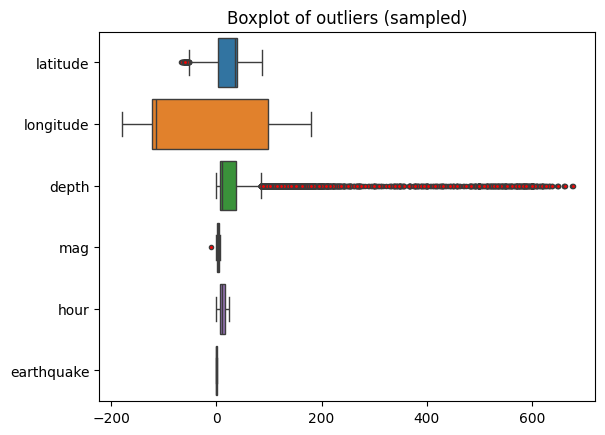

In [30]:
# Sample 10,000 rows randomly
sampled_df = df.sample(n=10000, random_state=42)
sns.boxplot(data=sampled_df, orient="h", flierprops=dict(markerfacecolor='red', markersize=3))
plt.title("Boxplot of outliers (sampled)")
plt.show()

In [31]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

df = remove_outliers(df, 'depth')
df = remove_outliers(df, 'mag')

df = df.reset_index(drop=True)


In [32]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f"Categorical columns: {categorical_cols}")

numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['date']
Numerical columns: ['latitude', 'longitude', 'depth', 'mag', 'hour', 'earthquake']


In [33]:
df[numerical_cols].describe()

,latitude,longitude,depth,mag,hour,earthquake
count,5.838362e+06,5.838362e+06,5.838362e+06,5.838362e+06,5.838362e+06,5.838362e+06
mean,2.606138e+01,-4.691763e+01,1.790369e+01,2.848007e+00,1.140776e+01,4.417294e-01
std,2.712395e+01,1.149722e+02,1.780065e+01,1.724847e+00,6.887762e+00,4.965930e-01
min,-8.442200e+01,-1.799985e+02,0.000000e+00,-2.600000e+00,0.000000e+00,0.000000e+00
25%,1.319070e+01,-1.227475e+02,5.100000e+00,1.250000e+00,5.000000e+00,0.000000e+00
50%,3.577233e+01,-1.163420e+02,1.000000e+01,2.600000e+00,1.100000e+01,0.000000e+00
75%,3.948300e+01,7.050000e+01,3.300000e+01,4.500000e+00,1.700000e+01,1.000000e+00
max,8.738600e+01,1.800000e+02,8.029000e+01,9.100000e+00,2.300000e+01,1.000000e+00


In [34]:
X = df[['latitude', 'longitude', 'depth', 'mag', 'hour']]
y = df['earthquake']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
print("\nData is ready for machine learning modeling")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data is ready for machine learning modeling
Training set size: 4670689 samples
Testing set size: 1167673 samples


In [38]:
#XGBoost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
print("XGBClassifier metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Classification report
print(metrics.classification_report(y_test, y_pred))

# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))


XGBClassifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    651878
           1       1.00      1.00      1.00    515795

    accuracy                           1.00   1167673
   macro avg       1.00      1.00      1.00   1167673
weighted avg       1.00      1.00      1.00   1167673

[[651878      0]
 [     0 515795]]


In [ ]:
import joblib

# Replace 'xgb' with your actual model variable if different
joblib.dump(xgb, r'C:\Users\ridaa\OneDrive\Desktop\Earthquake_Prediction\Artifacts\xgb_model_exp.joblib')

['C:\\Users\\ridaa\\OneDrive\\Desktop\\Earthquake_Prediction\\Artifacts\\xgb_model_exp.joblib']

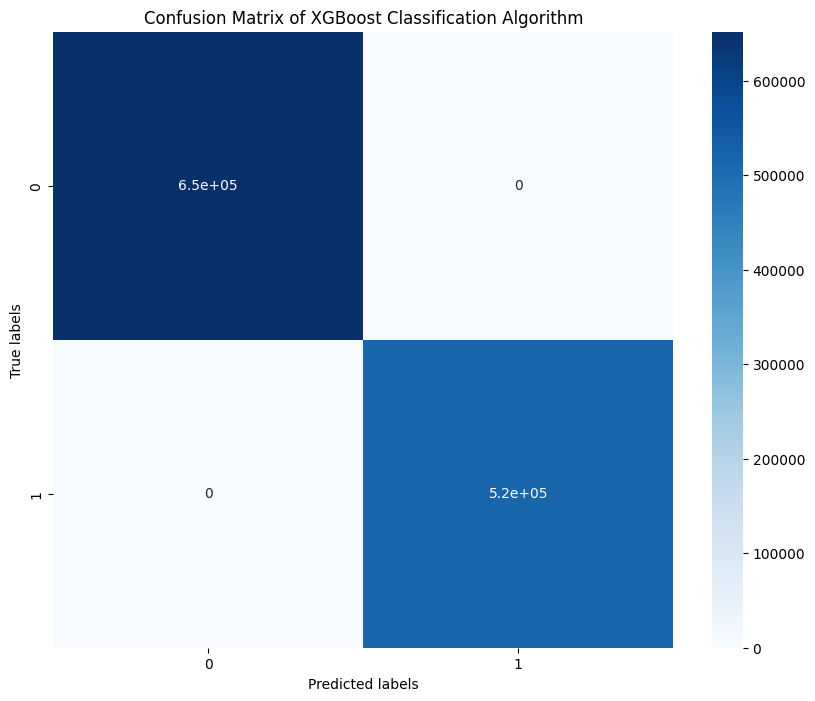

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of XGBoost Classification Algorithm')
plt.show()



In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)



In [41]:
print("RandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

RandomForestClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [42]:
# Classification report
print("Random Forest Classification Report :")
print(metrics.classification_report(y_test, y_pred))

# Confusion matrix
print("Random Forest Confusion Matrix :")
print(metrics.confusion_matrix(y_test, y_pred))


Random Forest Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    651878
           1       1.00      1.00      1.00    515795

    accuracy                           1.00   1167673
   macro avg       1.00      1.00      1.00   1167673
weighted avg       1.00      1.00      1.00   1167673

Random Forest Confusion Matrix :
[[651878      0]
 [     0 515795]]


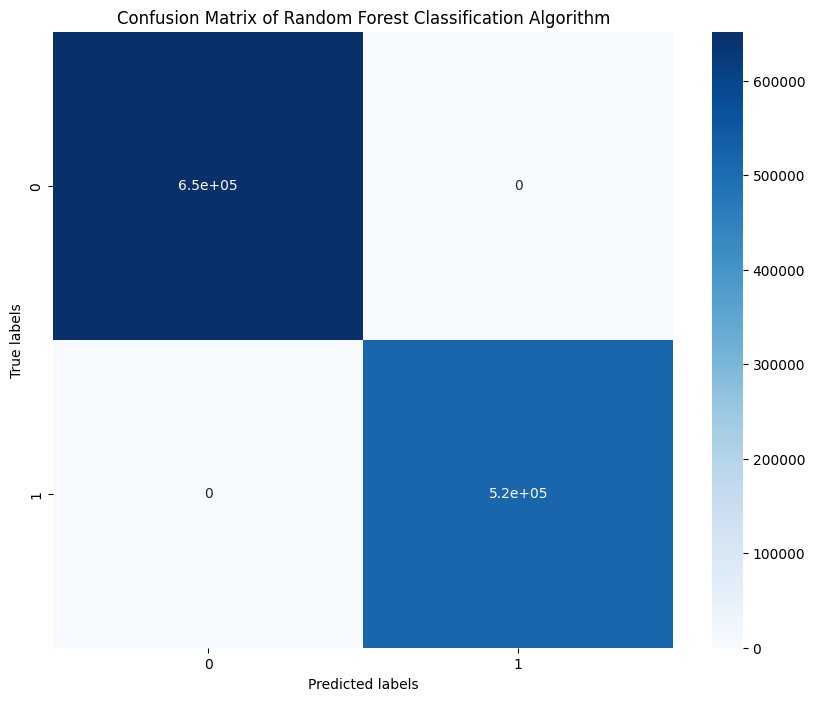

In [43]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest Classification Algorithm')
plt.show()

In [46]:
# Inspect the output of Data Transformation

from src.Earthquake_prediction.components.Data_transformation import DataTransformation
import joblib
import numpy as np

# Initialize the transformation object
dt = DataTransformation()

# Run the transformation and get the arrays
train_arr, test_arr = dt.initialize_data_transformation(
    r'C:\Users\ridaa\OneDrive\Desktop\Earthquake_Prediction\Artifacts\train_data.csv',
    r'C:\Users\ridaa\OneDrive\Desktop\Earthquake_Prediction\Artifacts\test_data.csv'
)

print("Train array shape:", train_arr.shape)
print("Test array shape:", test_arr.shape)
print("First 5 rows of train array:\n", train_arr[:5])

# Load and inspect the preprocessor object
preprocessor = joblib.load('Artifacts/preprocessor.pkl')
print("\nPreprocessor pipeline structure:\n", preprocessor)

ModuleNotFoundError: No module named 'src'